# Handwritten Text Recognition

## Authors

* **Alar Akilbekov (a_akilbekov@kbtu.kz)** - [git:alarxx](https://github.com/alarxx) - [tg:@alarxx](https://t.me/alarxx)
* **Baktiyar Toksanbay (b_toksanbay@kbtu.kz)**

## Outline

- [Previous projects](##Previous-projects)
- [Datasets](##Datasets)
- [Description](##Description)
- [Approaches for Handwriting Recognition](##Approaches-for-Handwriting-Recognition)
- [Text Detection](##Text-Detection)
  - [Our Approach](##Our-Approach)
- [Text Recognition](##Text-Recognition)
  - Alphabet Recognition
  - Word Recognition with CTC Loss
- [Model Architecture](##Model)
- [Web Application Prototype](##Web-Application-Prototype)
- [Conclusion](##Conclusion)
- [Future Work](##Future-Work)
- [License](##Licence)
  - Mozilla Public License
- [References](##References) 


## GitHub

https://github.com/alarxx/HTR

## Previous projects

- Handwriting-Recognition: https://github.com/alarxx/Handwriting-Recognition
- Tensor-library: https://github.com/alarxx/Tensor-library

## Datasets

- CMNIST: https://github.com/bolattleubayev/cmnist
- KOHTD: Kazakh Offline Handwritten Text Dataset: https://github.com/abdoelsayed2016/KOHTD

---

## Description

Handwriting recognition can mean 2 things:  

**On-line:** recognizing handwriting when written on the tablet screen directly, which is considered a simpler task
- pen-based computer screen surface
- pen-up and pen-down switching
- pen pressure
- velocity/changes of writing direction
- specifically

**Off-line:** recognizing handwriting from photos (our aim) 
- piece of paper
- image

**Problem**  
Input data: Image  
Output data: written text on the image  

Sub-tasks:
- Text Detection
- Text Recognition


---

## Approaches for **[Handwriting Recognition (HWR)](https://en.wikipedia.org/wiki/Handwriting_recognition):**
- [Optical Character Recognition (OCR)](https://en.wikipedia.org/wiki/Optical_character_recognition)
- [Intelligent character recognition (ICR)](https://en.wikipedia.org/wiki/Intelligent_character_recognition)
- [Intelligent Word Recognition (IWR)](https://en.wikipedia.org/wiki/Intelligent_word_recognition)

### OCR and ICR

**OCR** engines are primarily focused on character-by-character machine printed text recognition from a scanned document and **ICR** for different fonts or even handwritten text:

<img src="https://raw.githubusercontent.com/alarxx/HTR/refs/heads/main/htr/proposal_materials/examples/ICR_Example.jpg" alt="ICR_Example.jpg" width="800"/>


### IWR

**Intelligent Word Recognition (IWR)** is the recognition of unconstrained handwritten words. IWR recognizes entire handwritten words or phrases instead of character-by-character, like its predecessors. (our aim).

<img src="https://raw.githubusercontent.com/alarxx/HTR/refs/heads/main/my_plots/recognized1.png" alt="recognized1.png" width="1000"/>

<img src="https://raw.githubusercontent.com/alarxx/HTR/refs/heads/main/my_plots/val_rec_1_avg_conf.png" alt="val_rec_1_avg_conf.png" width="1000"/>


## Text Detection

**Applied Algorithm of Text Detection**
1. Estimation of average text height using EAST
2. Morphological transformation finds text regions.
3. Visualization and cropping out text regions for further analysis.

Morphological kernel is necessary to identify lines of text. Its width is proportional to the height of the text and also conventionally kernel size must be an **odd number**.

The approach combines the advantages of deep model (EAST) with classical image processing methods.

**Limitations**  
The method is designed to detect individual words on white paper, where the lines of text are written horizontally. This is a limitation, because handwritten text can be written in different structures, in a circle, in tables, and there can be different mathematical formulas and this requires a different research.

### Tesseract 
GitHub: https://github.com/alarxx/HTR/blob/main/htr/detection/how_to_tesseract.py

Tesseract recognizes machine text perfectly, but it is not designed to recognize handwritten text.  

On printed text  
<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/tesseract/printed_tesseract.png" alt="printed_tesseract.png" width="1000"/>


On handwritten text  
<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/tesseract/handwritten_tesseract.png" alt="handwritten_tesseract.png" width="1000"/>


### EAST
GitHub: https://github.com/alarxx/HTR/blob/main/htr/detection/east.py

East detector is designed more for machine printed text. 

In the resulting detector we use 2 methods: Morphological Transformations and EAST Detector.


On printed text  
<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/EAST_IMAGES/example2_.jpg" alt="printed text detection" width="800"/>

On handwritten text  
<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/EAST_IMAGES/gnhk_019_.png" alt="handwritten text detection" width="400"/>

<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/EAST_IMAGES/gnhk_015_.png" alt="difficult handwritten text detection" width="400"/>

It can be observed that if EAST found a word, it is quite likely to be a word, but it often misses words (High Acc and High Precision). We use this in our text detection approach.

One interesting thing is that EAST can find words at an angle.


<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/EAST_IMAGES/round_.jpg" alt="round text detection" width="400"/>


### Our Approach
GitHub: https://github.com/alarxx/HTR/blob/main/prod/detection/mydetector.py

Morphological Transformations are a heuristic approach that consists of several steps: Canny Edge Detector, Morphological Closing (Dilation followed by Erosion). 

The detection method is designed for words written horizontally on more or less clean paper, not on checkered paper and without various drawings.

#### Canny

<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/morpho/Canny.png" alt="Canny" width="400"/>


#### Morphological Closing (Dilation followed by Erosion)  
https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

Original  
![image](https://github.com/user-attachments/assets/ad661286-df81-4722-8fd1-b0fc60880c2d)

Dilation  
![image](https://github.com/user-attachments/assets/d25f49ea-deb4-4af2-b040-df13b0aa118e)

Erosion  
![image](https://github.com/user-attachments/assets/23667997-13a6-4c3a-b259-d29e38cc7f9a)

Closing (Dilation followed by Erosion)  
![image](https://github.com/user-attachments/assets/710a3dd2-a721-4a3a-9c87-e3cc343d7d18)


<img src="https://github.com/alarxx/HTR/blob/main/my_plots/presentation_purpose/morpho_op.png?raw=true" alt="image" width="800"/>

The main parameter in our case is the kernel width. Depending on the width we can find strings, words and letters if they are written separately. 
As I have already written you can see that if EAST finds a word, it is quite likely to be a word, but it often misses words. We can take the average height of the word found and make the kernel width for Closing proportional to that average height. We assume that if there is more than avg_height/2 between contours, then they are different words. We use the kernel size (CxAvg_height), C > 2, to find lines.

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/presentation_purpose/morph_kernels_width.png?raw=true" alt="image" width="800"/>




(15x7): if the kernel is too narrow, it will find garbage  
<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/morpho/closed15x7.png" alt="closed15x7.png" width="400"/>
<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/morpho/boxes15x7.png" alt="boxes15x7.png" width="400"/>  

(50x7): good kernel size for word searches for this example  
<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/morpho/closed50x7.png" alt="closed50x7.png" width="400"/>
<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/morpho/boxes50x7.png" alt="boxes50x7.png" width="400"/>  

(150x7): too broad a kernel for word search for this example  
<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/morpho/closed150x7.png" alt="closed150x7.png" width="400"/>
<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/morpho/boxes150x7.png" alt="boxes150x7.png" width="400"/>  

(500x7): a wide enough kernel can be useful for line searches   
<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/morpho/closed500x7.png" alt="closed500x7.png" width="400"/>
<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/morpho/boxes500x7.png" alt="boxes500x7.png" width="400"/>  


Morphological kernel is necessary to identify lines of text. Its width is proportional to the height of the text, that we estimate using EAST Detector, and also conventionally kernel size must be an odd number.  

Another important point is to sort the words in order. We cannot sort the words based only on their x, y-axes, because the text is more often written at an angle, so we need to find the lines (lines) of the text. Let's imagine that we have found rectangular regions of the lines of the test and individual words. First, we need to map each word to its line based on intersections. Second, we need to sort these words on the x-axis.  

HTR\htr\detection\my_comparisons\our_approach

<img src="https://github.com/alarxx/HTR/raw/main/htr/detection/my_comparisons/our_approach/steps.png" alt="steps.png" width="1000"/>

<img src="https://raw.githubusercontent.com/alarxx/HTR/main/htr/detection/my_comparisons/our_approach/result.png" alt="result.png" width="800"/>

Now we can cut out the found parts of words, recognize them and sequentially arrange them, building a finished recognized text.

## Text Recognition

1) Alphabet Recognition to prove that model can classify letters on CMNIST
2) Word Recognition with CTC Loss on KOHTD

The word recognition (IWR) approach with CTC Loss can be called an end-to-end word recognition solution, since it does not involve intermediate letter search as is done in OCR or ICR. Even so, the recognition model itself remains without dramatic changes, so to prove that the model is capable of recognizing individual letters, we first experiment with alphabet recognition. 
The end-to-end approach implies that the model will sequentially recognize sections of the image, moving from left to right, for each section producing a vector of probabilities of each letter of the alphabet, as well as the probability of the intervening inter-letter space (blank). It is easier to describe this as if we were feeding the model the image region, but in reality this approach would not be optimal and in the implementation we are doing the wrong thing. CNNs can handle images of almost any dimensionality, the problem would only be with a finite MLP that accepts a vector of a certain dimensionality, to solve this there are so called Fully CNNs that accept images of any dimensionality and output varying dimensionality. This is important to know because in word recognition, our model takes whole word images and outputs a matrix with a varying number of columns, where each column is a vector of probabilities of a letter or blank in an image segment, in our implementation a segment of size rx8. This varying length is achieved by Global Max Pooling (GMP) in height. In our implementation of the model, for each rx8 region after GMP, we have a vector of dimension 512 that we feed to the MLP, and the number of such vectors depends on the width of the input image, which should be equal to width // 8. 

VGG (Simonyan & Zisserman, 2014).  
GAP (Lin, 2013).

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/presentation_purpose/ctc.png?raw=true" alt="ctc.png" width="800"/>    

Source: https://towardsdatascience.com/intuitively-understanding-connectionist-temporal-classification-3797e43a86c  


## Model 

VGG-like model with Global Max Pooling in height and after MLP. It is a CNN that takes images of almost any dimension and outputs features as if it were a time series, which we can potentially pass on to appropriate models that process time series like LSTM, GRU or Transformer.

For the classification of letters we use GMP outputting 1x1.

The number of both convolutional and pooling layers is calculated based on Receptive Field so that the model can recognize 64x64 patterns.


<img src="https://github.com/alarxx/HTR/blob/main/my_plots/presentation_purpose/receptive_field.png?raw=true" alt="receptive_field.png" width="600"/>   

Source: https://www.almabetter.com/bytes/articles/receptive-field-for-cnn-in-layperson-s-words  

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/presentation_purpose/vgg_like.png?raw=true" alt="vgg_like.png" width="800"/>   

Source: https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5  

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/presentation_purpose/gmp.png?raw=true" alt="gmp.png" width="400"/>   

Source: https://www.researchgate.net/figure/llustrates-the-working-of-Global-Max-Pooling-GMP_fig5_336166764  


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#############################################################
# Model: Simple CNN + Linear for signs
#
# Idea:
# 1) CNN reduces height to 1 (or small size),
# 2) The output is the tensor B x C x H' x W'
# 3) Turn it into a shape (W', B, C) and through a linear layer
# get class logits for each “time step” (W').
#
# CNN Sliding Window:
# Due to the CNN's vertical GMP without an explicit “sliding window” loop, the CNN itself creates a
# a “windowed” (sequential) data structure horizontally.
#############################################################

class FCNN(nn.Module):
    def __init__(self, num_classes):
        super(FCNN, self).__init__()
        # Пример весьма простой архитектуры
        self.features = nn.Sequential(
            # ---1 convolution block---
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),  # Входные RGB-каналы -> 32 фильтра
            nn.LeakyReLU(),
            # nn.Dropout(0.25), # Dropout, p - probability of an element to be zeroed
            # ---2 convolution block---
            nn.Conv2d(64, 64, kernel_size=3, padding=1),  # 64 -> 64 фильтра
            nn.LeakyReLU(),
            nn.MaxPool2d(2),  # (64 -> 32)
            # nn.Dropout(0.25),                               # Dropout

            # ---3 convolution block---
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # 64 -> 128 фильтра
            nn.LeakyReLU(),
            # nn.Dropout(0.25),
            # ---4 convolution block---
            nn.Conv2d(128, 128, kernel_size=3, padding=1),  # 128 -> 128 фильтров
            nn.LeakyReLU(),
            nn.MaxPool2d(2),  # (32 -> 16)
            # nn.Dropout(0.25), # Dropout

            # ---5 сверточный блок---
            nn.Conv2d(128, 256, kernel_size=3, padding=1),  # 256 -> 512 фильтров
            nn.LeakyReLU(),
            # nn.Dropout(0.25),
            # ---6 convolution block---
            nn.Conv2d(256, 256, kernel_size=3, padding=1),  # 512 -> 512 фильтров
            nn.LeakyReLU(),
            nn.MaxPool2d(2),  # (16 -> 8)
            # nn.Dropout(0.25),

            # ---7 convolution block---
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.LeakyReLU(),
            # nn.Dropout(0.25),
            # ---8 convolution block---
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.LeakyReLU(),
            nn.Dropout(p=0.3),

            # 8 x ?
            nn.AdaptiveAvgPool2d((1, None))  # высоту до 1, ширина без изменения
        )
        # self.fc = nn.Linear(512, num_classes)  # Преобразуем фичи в логиты символов
        # Multilayer Perceptron
        self.fc = nn.Sequential(
            # ---9 linear block---
            nn.Linear(512, 256), # Полносвязный слой
            nn.LeakyReLU(),
            nn.Dropout(p=0.3), # Dropout для регуляризации
            # ---10 linear block---
            nn.Linear(256, num_classes) # Выходной слой с количеством классов
        )

    def forward(self, x):
        # print(x.shape)
        
        # x: B x 3 x H x W
        x = self.features(x)  # B x 512 x 1 x W'
        # Удаляем высоту (теперь = 1)
        x = x.squeeze(2)  # B x 512 x W'
        x = x.permute(2, 0, 1)  # W' x B x 512 (потому что CTC ждёт (T,B,C))
        logits = self.fc(x)     # W' x B x num_classes
        return logits

## Alphabet Recognition

**Methodology**
- Data loading and preparation with augmentation
- Organization of cross-validation. 
- Model training (using GPU if available)
- Logging of accuracy after each training epoch 
- Visualization of accuracy plots
- Saving and loading the model
- Using the model for predictions

Alphabet Validation  
Dataset is not balanced.  
F-Score Macro - Equalizes the contribution of each class, which is useful for evaluation when all classes are of interest, regardless of their size.
Because we care about each class regardless of size, otherwise we would keep using Accuracy.

**Cross-Validation**

Для Alphabet Recognition используем Scikit-Learn StratifiedKFold для сохранения баланса между классами, для распознавания слов будем использовать KFold.  

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/presentation_purpose/cross_validation.png?raw=true" alt="cross_validation.png" width="800"/>    

Source: https://www.researchgate.net/figure/sual-representation-of-the-training-test-and-validation-split-using-cross-validation_fig3_338676025


<img src="https://github.com/alarxx/HTR/blob/main/my_plots/orig.png?raw=true" alt="orig.png" width="600"/>.  

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/global_train.png?raw=true" alt="global_train.png" width="600"/>
<img src="https://github.com/alarxx/HTR/blob/main/my_plots/global_test.png?raw=true" alt="global_test.png" width="600"/>.   
 
<img src="https://github.com/alarxx/HTR/blob/main/my_plots/kfold_train.png?raw=true" alt="kfold_train.png" width="600"/>
<img src="https://github.com/alarxx/HTR/blob/main/my_plots/kfold_validation.png?raw=true" alt="kfold_validation.png" width="600"/>.   


**Augmentation**

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/augmentation.png?raw=true" alt="augmentation.png" width="800"/>    

**Results**

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/avg_losses.png?raw=true" alt="avg_losses.png" width="800"/>   

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/train_val_15.png?raw=true" alt="train_val_15.png" width="800"/>   

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/confusion_matrix.png?raw=true" alt="confusion_matrix.png" width="800"/>   

Learning Duration: 4 hours 18  

Best model is from fold 4 with Validation F-Score: 0.9639  

Test dataset: 24247  

Test Accuracy: 96.38%  
Test F1-Score: 96.33%  


**Fusion of models**

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/presentation_purpose/fusion.png?raw=true" alt="fusion.png" width="400"/>   

Source: https://ilyasbinsalih.medium.com/what-is-hard-and-soft-voting-in-machine-learning-2652676b6a32

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/fusion_confusion.png?raw=true" alt="fusion_confusion.png" width="800"/>   


Test dataset: 24247   

Test Accuracy: 96.38% -> 96.77%  
F1-Score: 96.33% -> 96.78%  

0.0039 * 24247 = 94 samples  

## Word Recognition with CTC Loss

GitHub: https://github.com/alarxx/HTR/blob/main/ctc/training.py

Since we are using almost the same model, we use the first layers from an already trained model on the alphabet, which we don't really need to do, but we hypothesize that it should speed up the training and convergence of our model.

### CTC Loss

Loss Function for seq2seq without explicit alignment as they usually do for RNNs (Graves, 2006). The algorithm at the core of all voice assistants and not only that as we see. 

We have more or less figured out the math and usage of CTC Loss. We were able to recognize unaligned seq2seq handwritten text.

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/presentation_purpose/ctc_greedy.png?raw=true" alt="ctc_greedy.png" width="400"/>    

Source: https://towardsdatascience.com/intuitively-understanding-connectionist-temporal-classification-3797e43a86c  


The likelihood of a particular path:
$$
p(\pi|\mathbf{x}) = \prod_{t=1}^T y_t^{\pi_t}, \quad \forall \pi \in \mathcal{L}'^T
$$

The likelihood of a certain word:
$$
p(l|\mathbf{x}) = \sum_{\pi \in \mathcal{B}^{-1}(l)} p(\pi | \mathbf{x}).
$$

Greedy decoding to obtain the final prediction:
$$
h(\mathbf{x}) = \arg\max_{l \in \mathcal{L}^{\leq T}} p(l | \mathbf{x}).
$$

Determining the error on a subsample:
$$
LER(h, S') = \frac{1}{Z} \sum_{(x, z) \in S'} ED(h(x)).
$$

#### Forward-Backward Algorithm

Function $\alpha_t(s)$:

$$
\alpha_t(s) \stackrel{\text{def}}{=} \sum_{\pi \in N^T : \mathcal{B}(\pi_{1:t}) = l_{1:s}} \prod_{t' = 1}^t y_{\pi_{t'}}^{t'}.
$$

Initialization of $\alpha_1(s)$:

$$
\alpha_1(1) = y_b^1, \\ 
\alpha_1(2) = y_{l_1}^1, \\ 
\alpha_1(s) = 0, \; \forall s > 2.
$$

Definition $\bar{\alpha}_t(s)$:

$$
\bar{\alpha}_t(s) \stackrel{\text{def}}{=} \alpha_{t-1}(s) + \alpha_{t-1}(s-1).
$$

Recursion for $\alpha_t(s)$:

$$
\alpha_t(s) =
\begin{cases} 
    \bar{\alpha}_t(s) y_{l_s}^t, & \text{if } l_s = b \text{ or } l_{s-2} = l_s, \\
    (\bar{\alpha}_t(s) + \alpha_{t-1}(s-2)) y_{l_s}^t, & \text{otherwise.}
\end{cases}
$$

Probability $p(l | \mathbf{x})$:

$$
p(l | \mathbf{x}) = \alpha_T(|l'|) + \alpha_T(|l'| - 1).
$$


Function $\beta_t(s)$:

$$
\beta_t(s) \stackrel{\text{def}}{=} \sum_{\pi \in N^T : \mathcal{B}(\pi_{t:T}) = l_{s:|l|}} \prod_{t'=t}^T y_{\pi_{t'}}^{t'}
$$

Initialization $\beta_T(s)$:

$$
\beta_T(|l'|) = y_b^T, \\ 
\beta_T(|l'| - 1) = y_{l_{|l|}}^T, \\ 
\beta_T(s) = 0, \; \forall s < |l'| - 1.
$$

Recursion for $\beta_t(s)$:

$$
\beta_t(s) =
\begin{cases} 
    \bar{\beta}_t(s) y_{l_s}^t, & \text{if } l_s = b \text{ or } l_{s+2} = l_s, \\
    (\bar{\beta}_t(s) + \beta_{t+1}(s+2)) y_{l_s}^t, & \text{otherwise.}
\end{cases}
$$

Where $\bar{\beta}_t(s)$ is defined as:

$$
\bar{\beta}_t(s) \stackrel{\text{def}}{=} \beta_{t+1}(s) + \beta_{t+1}(s+1).
$$

Cumulative normalization coefficients:

$$
C_t \stackrel{\text{def}}{=} \sum_s \alpha_t(s), \quad \hat{\alpha}_t(s) \stackrel{\text{def}}{=} \frac{\alpha_t(s)}{C_t}.
$$

$$
D_t \stackrel{\text{def}}{=} \sum_s \beta_t(s), \quad \hat{\beta}_t(s) \stackrel{\text{def}}{=} \frac{\beta_t(s)}{D_t}.
$$

### Maximum Likelihood

$$
O^{ML}(S, \mathcal{N}_w) = - \sum_{(x, z) \in S} \ln \big(p(z | \mathbf{x})\big).
$$

The gradient of the maximum likelihood function:

$$
\frac{\partial O^{ML}(\{(\mathbf{x}, z)\}, \mathcal{N}_w)}{\partial y_k^t} = - \frac{\partial \ln \big(p(z | \mathbf{x})\big)}{\partial y_k^t}.
$$

The product of $\alpha_t(s)$ and $\beta_t(s)$:

$$
\alpha_t(s) \beta_t(s) = \sum_{\pi \in \mathcal{B}^{-1}(l) : \pi_t = l_s'} y_{l_s}^t \prod_{t=1}^T y_{\pi_t}^t.
$$

The ratio of $\alpha_t(s)\beta_t(s)$ to probability:

$$
\frac{\alpha_t(s) \beta_t(s)}{y_{l_s}^t} = \sum_{\pi \in \mathcal{B}^{-1}(l) : \pi_t = l_s'} p(\pi | \mathbf{x}).
$$

The probability $p(l | \mathbf{x})$:

$$
p(l | \mathbf{x}) = \sum_{s=1}^{|l'|} \frac{\alpha_t(s) \beta_t(s)}{y_{l_s}^t}.
$$


Частная производная вероятности $p(l | \mathbf{x})$ по $y_k^t$:

$$
\frac{\partial p(l | \mathbf{x})}{\partial y_k^t} = \frac{1}{(y_k^t)^2} \sum_{s \in \text{lab}(l, k)} \alpha_t(s) \beta_t(s).
$$

The partial derivative of the probability $p(l | \mathbf{x})$ over $y_k^t$:

$$
\frac{\partial \ln \big(p(l | \mathbf{x})\big)}{\partial y_k^t} = \frac{1}{p(l | \mathbf{x})} \frac{\partial p(l | \mathbf{x})}{\partial y_k^t}.
$$

Gradient on network parameters:

$$
\frac{\partial O^{ML}(\{(\mathbf{x}, z)\}, \mathcal{N}_w)}{\partial u_k^t} = y_k^t - \frac{1}{y_k^t Z_t} \sum_{s \in \text{lab}(z, k)} \hat{\alpha}_t(s) \hat{\beta}_t(s).
$$

Normalization factor $ Z_t $

$$
Z_t \stackrel{\text{def}}{=} \sum_{s=1}^{|l'|} \frac{\hat{\alpha}_t(s) \hat{\beta}_t(s)}{y_{l_s}^t}.
$$

Additional math calculations can be found in the notes: https://github.com/alarxx/HTR/blob/main/ML_Notes_merged_compressed.pdf

A simple example of using CTC Loss: https://github.com/alarxx/HTR/blob/main/ctc/how_simple_ctc_overfit.py

### Augmentation

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/presentation_purpose/ctc_augmentation.png?raw=true" alt="ctc_augmentation.png" width="800"/>    


CPU times: total: 0 ns
Wall time: 0 ns


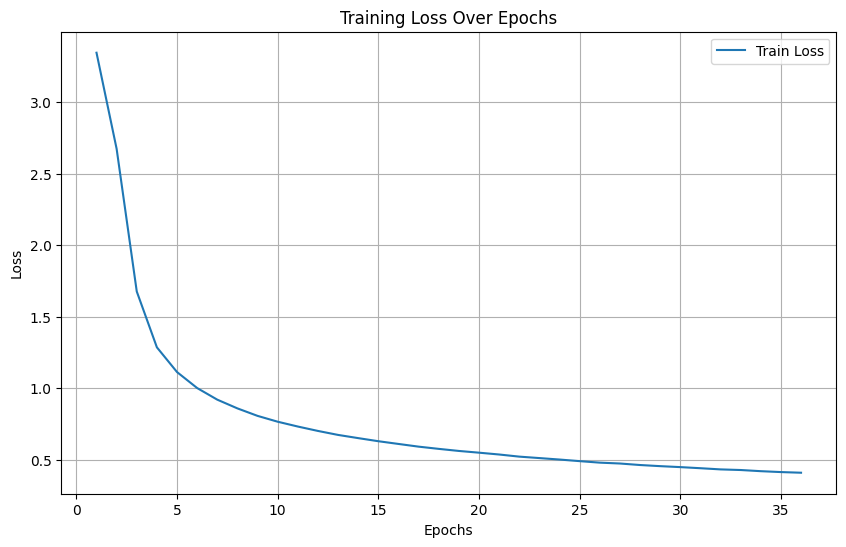

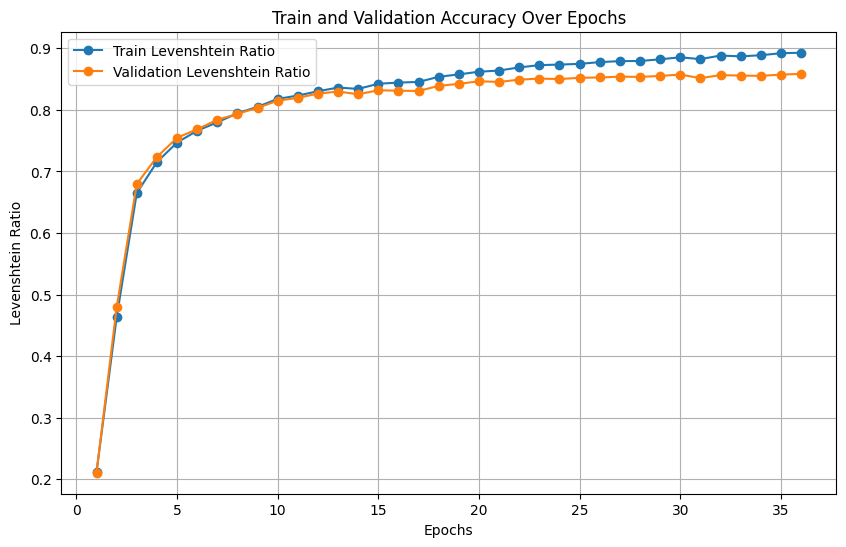

In [6]:
%time

import torch
import matplotlib.pyplot as plt

# Loading the last model
checkpoint_path = "./ctc/FCNN_CTC_e35.pth"
checkpoint = torch.load(checkpoint_path)
train_loss_history = checkpoint['train_loss_history']
train_acc_history = checkpoint['train_acc_history']
val_acc_history = checkpoint['val_acc_history']

alphabet = [
    '<blank>', 'А', 'Ә', 'Б', 'В', 'Г', 'Ғ', 'Д', 'Е', 'Ё', 'Ж', 'З',
    'И', 'Й', 'К', 'Қ', 'Л', 'М', 'Н', 'Ң', 'О', 'Ө', 'П', 'Р', 'С',
    'Т', 'У', 'Ұ', 'Ү', 'Ф', 'Х', 'Һ', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы',
    'І', 'Ь', 'Э', 'Ю', 'Я'
]
model = FCNN(num_classes=len(alphabet))
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Levenshtein Accuracy (Train & Val)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_acc_history) + 1), train_acc_history, label='Train Levenshtein Ratio', marker='o')
plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label='Validation Levenshtein Ratio', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Levenshtein Ratio')
plt.title('Train and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
%%time

import os
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split
import Levenshtein

#====================================================================
# Определение устройства (CPU/GPU)
#====================================================================
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print("device:", device)
print()

#############################################################
# Алфавит и маппинги
#############################################################
alphabet = [
    '<blank>', 'А', 'Ә', 'Б', 'В', 'Г', 'Ғ', 'Д', 'Е', 'Ё', 'Ж', 'З',
    'И', 'Й', 'К', 'Қ', 'Л', 'М', 'Н', 'Ң', 'О', 'Ө', 'П', 'Р', 'С',
    'Т', 'У', 'Ұ', 'Ү', 'Ф', 'Х', 'Һ', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы',
    'І', 'Ь', 'Э', 'Ю', 'Я'
]
char_to_idx = {ch: i for i, ch in enumerate(alphabet)}
idx_to_char = {i: ch for ch, i in char_to_idx.items()}

#############################################################
# Класс датасета
#############################################################
class HandwritingDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None):
        with open(annotation_file, 'r', encoding='utf-8') as f:
            self.annotations = json.load(f)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def text_to_sequence(self, text):
        seq = []
        for ch in text:
            ch = ch.upper()
            if ch in char_to_idx:
                seq.append(char_to_idx[ch])
            else:
                # Игнорируем неизвестные символы
                pass
        return seq

    def __getitem__(self, idx):
        sample = self.annotations[idx]
        img_path = os.path.join(self.img_dir, sample['name'])
        image = Image.open(img_path).convert('RGB')
        text = sample['description'].upper()

        if self.transform:
            image = self.transform(image)

        target = self.text_to_sequence(text)
        target_length = len(target)

        return image, torch.tensor(target, dtype=torch.long), torch.tensor(target_length, dtype=torch.long), text

#############################################################
# Обёртка для датасета с transforms
#############################################################
class CustomDataset(Dataset):
    def __init__(self, subset, transform):
        self.subset = subset
        self.transform = transform
    def __len__(self):
        return len(self.subset)
    def __getitem__(self, idx):
        image, target, target_length, text = self.subset[idx]
        if self.transform:
            image = self.transform(image)
        return image, target, target_length, text

#############################################################
# Функция collate для DataLoader
#############################################################
def collate_fn(batch):
    images, targets, target_lengths, texts = zip(*batch)

    # Паддинг по размеру внутри батча
    max_width = max(img.shape[2] for img in images)
    max_height = max(img.shape[1] for img in images)

    padded_images = []
    for img in images:
        _, h, w = img.shape
        padded = torch.zeros((3, max_height, max_width))
        padded[:, :h, :w] = img
        padded_images.append(padded)

    images = torch.stack(padded_images, dim=0)

    targets = torch.cat(targets, dim=0)
    target_lengths = torch.stack(target_lengths, dim=0)

    return images, targets, target_lengths, texts

#############################################################
# Инициализация датасета и даталоадеров
#############################################################
transform = transforms.Compose([
    transforms.Resize((64, 256)),
    transforms.ToTensor(),
])

train_transform = transforms.Compose([
    transforms.Resize((64, 256)),
    transforms.RandomRotation(degrees=5),
    transforms.RandomAffine(degrees=0, translate=(0.03, 0.03), scale=(0.95, 1.05), shear=5),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.ToTensor(),
])

dataset = HandwritingDataset(
    annotation_file="./ctc/KOHTD_dataset/HK_dataset/merged_annotation.json",
    img_dir="./ctc/KOHTD_dataset/HK_dataset/img",
)

train_indices, test_indices = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_indices, val_indices = train_test_split(train_indices, test_size=0.2, random_state=42)

train_ds = CustomDataset(Subset(dataset, train_indices), transform=train_transform)
val_ds = CustomDataset(Subset(dataset, val_indices), transform=transform)
test_ds = CustomDataset(Subset(dataset, test_indices), transform=transform)

batch_size = 64
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

#############################################################
# Функция для декодирования выхода модели (greedy decode)
# Возвращаем также среднюю уверенность
#############################################################
def greedy_decode(logits):
    # logits: [T, B, C]
    probs = F.softmax(logits, dim=2)  # [T, B, C]
    argmaxes = torch.argmax(probs, dim=2) # [T, B]
    results = []
    confidences = []
    for b in range(argmaxes.size(1)):
        seq = argmaxes[:, b].cpu().numpy()
        decoded = []
        char_confidences = []
        prev = None
        for t, s in enumerate(seq):
            if s != 0 and s != prev:
                decoded.append(s)
                char_confidences.append(probs[t, b, s].item())
            prev = s
        # text = ''.join(idx_to_char[idx] for idx in decoded)
        text = ''.join(idx_to_char[idx] for idx in decoded if idx in idx_to_char)
        results.append(text)

        if len(char_confidences) > 0:
            avg_conf = sum(char_confidences) / len(char_confidences)
        else:
            avg_conf = 0.0
        confidences.append(avg_conf)

    return results, confidences

#############################################################
# Загрузка обученной модели
#############################################################
model_prefix = "FCNN_CTC"
checkpoint_path = f"./ctc/{model_prefix}_e35.pth"

model = FCNN(num_classes=len(alphabet)).to(device)

checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

model.eval()

#############################################################
# Подсчёт WER и CER на тестовом датасете
#############################################################
total_char_distance = 0
total_chars = 0
total_word_distance = 0
total_words = 0

with torch.no_grad():
    for images, targets, target_lengths, texts in test_loader:
        images = images.to(device)
        logits = model(images)  # [T, B, C], предположим T это ширина фичей, B=batch
        # Для CTC декодирования предполагается (T, B, C)
        # Если модель возвращает (B, C, W, ...), надо преобразовать. Предположим, что logits уже в нужной форме.
        # Если нет, то надо дополнительно транспонировать:
        if logits.size(0) != images.size(0):
            # Предположим, что модель возвращает (B, C, W), надо поменять на (W, B, C)
            logits = logits.permute(2, 0, 1)  # если форма была (B, C, W)

        preds, confs = greedy_decode(logits)

        # Подсчёт ошибок
        for pred, gt in zip(preds, texts):
            # CER
            char_dist = Levenshtein.distance(pred, gt)
            total_char_distance += char_dist
            total_chars += len(gt)

            # WER (разбиваем по пробелам, если есть)
            pred_words = pred.split()
            gt_words = gt.split()
            word_dist = Levenshtein.distance(' '.join(pred_words), ' '.join(gt_words))
            total_word_distance += word_dist
            total_words += len(gt_words)

CER = total_char_distance / total_chars if total_chars > 0 else 0.0
WER = total_word_distance / total_words if total_words > 0 else 0.0

print("Test CER: {:.4f}".format(CER))
print("Test WER: {:.4f}".format(WER))


device: cuda

Test CER: 3.6601
Test WER: 22.7076
CPU times: total: 5min 31s
Wall time: 1min 26s


#### Test CER: 3.6601
#### Test WER: 22.7076

ӨЛШЕП -> ОЛЕЫ, средняя уверенность: 0.8065
<class 'numpy.ndarray'> uint8
(64, 256, 3)
БҰЛ -> БҰЛ, средняя уверенность: 0.9219
<class 'numpy.ndarray'> uint8
(64, 256, 3)
АЛУ, -> АЛУ, средняя уверенность: 0.7648
<class 'numpy.ndarray'> uint8
(64, 256, 3)
БЕРУ, -> БЕРУ, средняя уверенность: 0.9544
<class 'numpy.ndarray'> uint8
(64, 256, 3)
СОЛ -> СОЛ, средняя уверенность: 0.7121
<class 'numpy.ndarray'> uint8
(64, 256, 3)
КАБЕЛЬ -> ИАБЕЛЬ, средняя уверенность: 0.8538
<class 'numpy.ndarray'> uint8
(64, 256, 3)
ЖҮЙЕСІНДЕ -> ЖҮЙЕІНДЕ, средняя уверенность: 0.9468
<class 'numpy.ndarray'> uint8
(64, 256, 3)


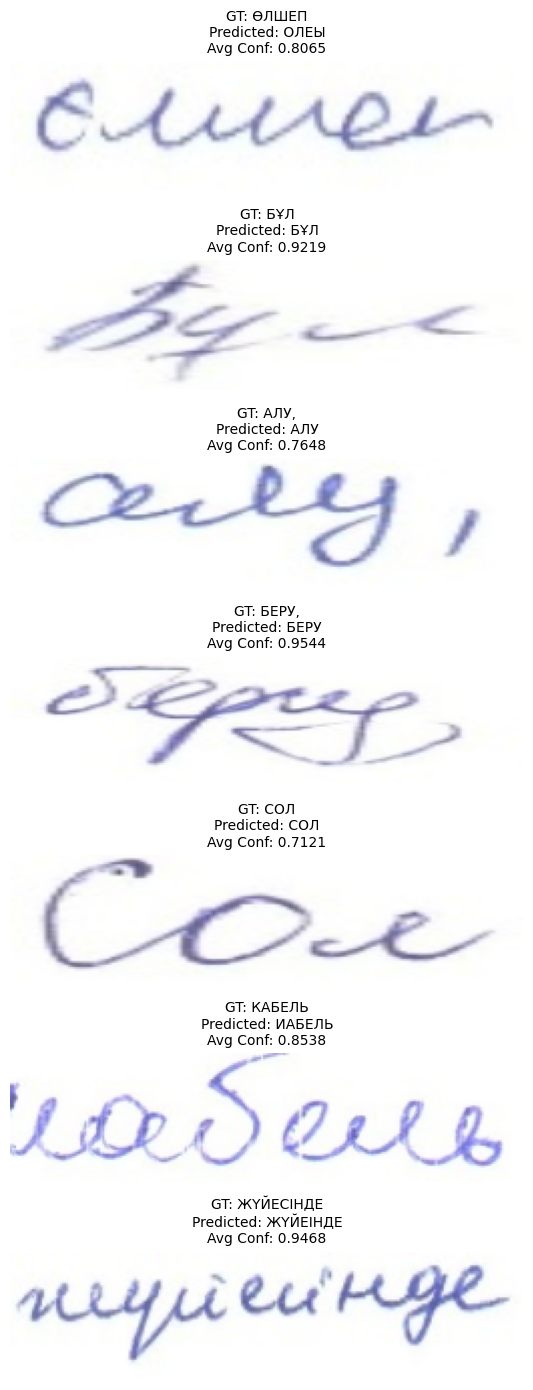

CPU times: total: 1.66 s
Wall time: 629 ms


In [14]:
%%time 

def ntensor2cvmat(chw_tensor):
    # Convert tensor back to OpenCV format
    # [C, H, W] -> [H, W, C]
    numpy_img = chw_tensor.permute(1, 2, 0).mul(255.0).byte().numpy()  # [0, 255]
    print(type(numpy_img), numpy_img.dtype)
    print(numpy_img.shape) # [H, W, C]
    return numpy_img

ds = test_ds

num_samples = 7  # Кол-во случайных примеров

fig, axes = plt.subplots(nrows=num_samples, ncols=1, figsize=(8, num_samples*2))
if num_samples == 1:
    axes = [axes]

for i in range(num_samples):
    idx = random.randint(0, len(ds)-1)
    image, target, target_length, text = ds[idx]

    # Подготовка изображения для модели
    image_input = image.unsqueeze(0).to(device)

    with torch.no_grad():
        logits = model(image_input)
        preds, confs = greedy_decode(logits)
        recognized = preds[0] if len(preds) > 0 else ""
        avg_conf = confs[0] if len(confs) > 0 else 0.0

    # Вывод результата
    print(f"{text} -> {recognized}, средняя уверенность: {avg_conf:.4f}")

    # Отображение изображения
    img_show = ntensor2cvmat(image)
    axes[i].imshow(img_show)
    axes[i].set_title(f"GT: {text}\nPredicted: {recognized}\nAvg Conf: {avg_conf:.4f}", fontproperties=None)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Web application prototype

The project is deployed on Google Cloud using a student subscription plan. We built the backend using Django framework, while the frontend was developed with basic HTML, CSS, and JavaScript without any additional frameworks. The system uses SQLite as a database to store information about previously processed images, which helps avoid analyzing the same image multiple times. Our file structure includes two main folders - 'uploads' for storing original images and 'processed' for keeping the analyzed versions. When a user uploads an image, the system first checks if it exists in SQLite, and if found, returns the cached result instead of running the analysis again. The backend runs on Gunicorn without containerization, which handles all the server operations. This setup provides a functional system for image processing while maintaining good performance through caching.

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/presentation_purpose/dev_stack.png?raw=true" alt="dev_stack.png" width="400"/>.    

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/presentation_purpose/web_architecture.png?raw=true" alt="web_architecture.png" width="800"/>    


http://34.34.30.90/

<img src="https://github.com/alarxx/HTR/blob/main/my_plots/presentation_purpose/web.png?raw=true" alt="web.png" width="1000"/>    

## Conclusion

Handwritten Text Recognition (HTR) is a challenging task aimed at recognizing handwritten text into a digital format to facilitate applications in document digitization. However, handwritten text recognition in the Kazakh language presents a unique challenge due to the complexity of its written language, the presence of specific characters, and the limited number of annotated datasets. 

The Handwritten Text Recognition (HTR) project demonstrates a comprehensive approach to tackling the challenging problem of recognizing handwritten text, specifically focusing on offline recognition from images. We have developed a pipeline capable of detecting and recognizing handwritten text.
An example of use can be found here: https://github.com/alarxx/HTR/blob/main/prod/recognizer.py

The proposed approach establishes a foundation for advancing handwritten text recognition in the Kazakh language.

**Text Detection:**  
We utilized a hybrid approach combining the EAST deep learning-based detector and classical image processing techniques such as Canny Edge Detection and Morphological Closing. This allowed for robust identification of text regions while addressing the limitations of handwritten text structures.

**Text Recognition:**  
For text recognition, we developed a VGG-like CNN architecture optimized for sequence-to-sequence tasks using Connectionist Temporal Classification (CTC) loss. This method enabled end-to-end word recognition without explicit segmentation, a crucial advancement for recognizing handwritten words with variable alignment and spacing.


**Alphabet Recognition:**  
Achieved a validation F1-Score of 96.33% and test accuracy of 96.38%. These results validate the model’s ability to classify individual characters effectively.

**Word Recognition:**  
Achieved a Character Error Rate (CER) of 3.66% and Word Error Rate (WER) of 22.71% on the test dataset. We obtained results on par with the best results of the dataset authors KOHTD: best CER 6.52%, best WER 22.60% (Toiganbayeva et al., 2022). Since this is Error Rate, the lower the value, the better. But, it's important to clarify that we only recognized letters of the alphabet.


**Augmentation and Cross-Validation:**  
Incorporating advanced data augmentation and stratified cross-validation ensured a robust and unbiased evaluation process, improving generalization on diverse handwriting styles.

**Prototype Deployment:**  
The project was successfully deployed on Google Cloud with a functional web interface. The system integrates caching and SQLite-based storage, optimizing response times for repetitive tasks. Link: http://34.34.30.90/

**Challenges and Limitations:**  
Circular and non-linear text layouts, tables, and mathematical formulas remain challenging and require further research.
Recognizing sequential patterns and improving end-to-end models for simultaneous detection and recognition are promising avenues for advancement.

## Future work
- Circular text recognition
- Table detection and structure recognition
- Sequential patterns of texts for recognition or post-processing
- End-to-end model for text detection and recognition
- Speech Recognition


## Licence 

[Mozilla Public License](https://github.com/alarxx/HTR/blob/main/LICENSE)

### Exhibit A - Source Code Form License Notice
```
This file is part of the HTR Project – a demo pipeline for Intelligent Word Recognition of unconstrained handwritten text.

Copyright © 2024 Alar Akilbekov, Baktiyar Toksanbay
All Rights Reserved.

SPDX-License-Identifier: MPL-2.0
--------------------------------
This Source Code Form is subject to the terms of the Mozilla Public License, v. 2.0. If a copy of the MPL was not distributed with this file, You can obtain one at https://mozilla.org/MPL/2.0/.

Contact: alar.akilbekov@gmail.com
```


## References:

Fundamental Books:
- Bishop, C. M., & Nasrabadi, N. M. (2006). Pattern recognition and machine learning (Vol. 4, No. 4, p. 738). New York: springer.
- Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. The MIT press.
- Raschka, S., Liu, Y., Mirjalili, V., & Dzhulgakov, D. (2022). Machine learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python. Packt.
- Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2023). Dive into deep learning. Cambridge University Press.

Beginner level books:
- Rashid, T. (2016). Make Your own neural network. CreateSpace Independent Publishing Platform.
- Weidman, S. (2019). Deep learning from scratch: Building with Python from first principles (First edition). O’Reilly Media, Inc.
- Patterson, J., & Gibson, A. (2017). Deep learning: A practitioner’s approach (First edition). O’Reilly.

OpenCV:
- Kaehler, A., & Bradski, G. (2016). Learning OpenCV 3: computer vision in C++ with the OpenCV library. " O'Reilly Media, Inc.".
- Szeliski, R. (2022). Computer vision: algorithms and applications. Springer Nature.
- Прохоренок, Н. А. (2018). OpenCV и Java. Обработка изображений и компьютерное зрение. БХВ-Петербург.


Text Detection References:
- https://googlecode.blogspot.com/2006/08/announcing-tesseract-ocr.html
- https://sourceforge.net/projects/tesseract-ocr/
- Smith, R. (2007, September). An overview of the Tesseract OCR engine. In Ninth international conference on document analysis and recognition (ICDAR 2007) (Vol. 2, pp. 629-633). IEEE.
- 
- EAST TEXT DETECTION EXAMPLE: https://github.com/opencv/opencv/blob/master/samples/dnn/text_detection.py
- Text detection model: https://github.com/argman/EAST
- Download link: https://www.dropbox.com/s/r2ingd0l3zt8hxs/frozen_east_text_detection.tar.gz?dl=1
- Zhou, X., Yao, C., Wen, H., Wang, Y., Zhou, S., He, W., & Liang, J. (2017). East: an efficient and accurate scene text detector. In Proceedings of the IEEE conference on Computer Vision and Pattern Recognition (pp. 5551-5560).
-
- Canny, J. (1986). A computational approach to edge detection. IEEE Transactions on pattern analysis and machine intelligence, (6), 679-698.
- https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html
- Vincent, L. (1991). Morphological transformations of binary images with arbitrary structuring elements. Signal processing, 22(1), 3-23.

Papers:
- Graves, A., Fernández, S., Gomez, F., & Schmidhuber, J. (2006, June). Connectionist temporal classification: labelling unsegmented sequence data with recurrent neural networks. In Proceedings of the 23rd international conference on Machine learning (pp. 369-376).
- Lin, M. (2013). Network in network. arXiv preprint arXiv:1312.4400.
- Nurseitov, D., Bostanbekov, K., Kurmankhojayev, D., Alimova, A., Abdallah, A., & Tolegenov, R. (2021). Handwritten Kazakh and Russian (HKR) database for text recognition. Multimedia Tools and Applications, 80(21), 33075-33097.
- Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556.
- Toiganbayeva, N., Kasem, M., Abdimanap, G., Bostanbekov, K., Abdallah, A., Alimova, A., & Nurseitov, D. (2022). Kohtd: Kazakh offline handwritten text dataset. Signal Processing: Image Communication, 108, 116827.

YouTube:
- Евгений Разинков. (2023). Machine Learning (2023, spring). https://www.youtube.com/playlist?list=PL6-BrcpR2C5SCyFvs9Xojv24povpBCI6W
- Евгений Разинков. (2022). Лекции по машинному обучению (осень, 2022). https://www.youtube.com/playlist?list=PL6-BrcpR2C5QYSAfoG8mbQUsI9zPVnlBV
- Евгений Разинков. (2021). Лекции по Advanced Computer Vision (2021). https://www.youtube.com/playlist?list=PL6-BrcpR2C5RV6xfpM7_k5321kJrcKEO0
- Евгений Разинков. (2021). Лекции по Deep Learning. https://www.youtube.com/playlist?list=PL6-BrcpR2C5QrLMaIOstSxZp4RfhveDSP
- Евгений Разинков. (2020). Лекции по компьютерному зрению. https://www.youtube.com/playlist?list=PL6-BrcpR2C5RZnmIWs6x0C2IZK6N9Z98I
- Евгений Разинков. (2019). Лекции по машинному обучению. https://www.youtube.com/playlist?list=PL6-BrcpR2C5RYoCAmC8VQp_rxSh0i_6C6